11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8441 - loss: 0.5468 - val_accuracy: 0.9572 - val_loss: 0.1542
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9628 - loss: 0.1257 - val_accuracy: 0.9697 - val_loss: 0.1062
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9773 - loss: 0.0755 - val_accuracy: 0.9737 - val_loss: 0.0910
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9748 - val_loss: 0.0819
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9896 - loss: 0.0369 - val_accuracy: 0.9766 - val_loss: 0.0811
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9728 - val_loss: 0.1025
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9744 - val_loss: 0.0982
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9951 - loss: 0.0168 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1275
Test Loss: 0.10259831696748734
Test Accuracy: 0.978600025177002


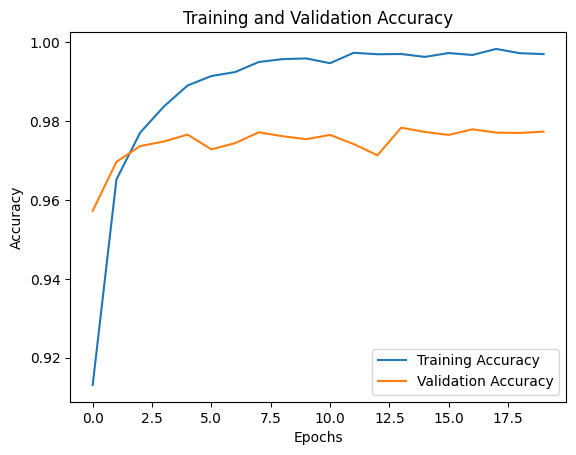

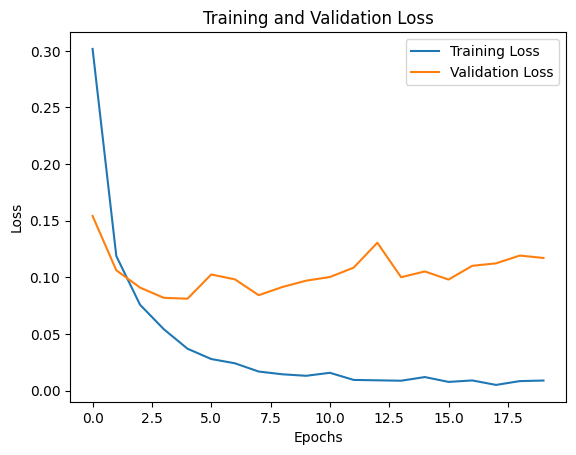

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add channel dimension to images
train_images = np.expand_dims(train_images, axis=-1)  # Shape: (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Shape: (10000, 28, 28, 1)

# Confirm the data shapes
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)

# Define the input shape
input_shape = (28, 28, 1)

# Define the model
model = Sequential([
    Input(shape=input_shape),  # Input layer
    Flatten(),  # Flatten the 28x28 image into a vector
    Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Save the trained model
model.save("mnist_digit_model.h5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
